# NOTEBOOK ENTREGABLE 0 SIMPSONS

En este Notebook se realiza la representación de los datos obtenidos en el contenedor de Python sobre los datos obtenidos de la [API de los simpsons][simpsons]


[//]: # (These are reference links used in the body of this note and get stripped out when the markdown processor does its job.)

[simpsons]: <https://thesimpsonsquoteapi.glitch.me/quotes>

## Gráfico palabras más habituales

En el gráfico, se muestra una representación de las palabras más habituales generadas con el programa main.py que se van guardando en el archivo countedWords.csv


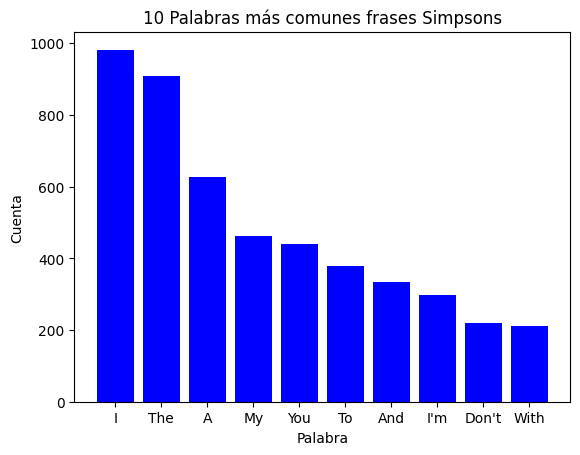

In [15]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt


data = pd.read_csv('results/countedWords.csv')

df = pd.DataFrame(data)

dfSorted = df.sort_values(by='Cuenta', ascending=False)



X = list(dfSorted.iloc[:10, 0])
Y = list(dfSorted.iloc[:10, 1])
    
# Plot the data using bar() method
plt.title("10 Palabras más comunes frases Simpsons")
plt.xlabel("Palabra")
plt.ylabel("Cuenta")
    
plt.bar(X, Y, color='b')
    
plt.show()
plt.close('all')
  



